In [110]:
import pandas as pd
import sqlalchemy as sql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps
import numpy as np

# Sommaire

<ol><li>Netoyage des données</li>
    <li>Etude sur l'huile de palmes<ul><li></li>
        </ul>
    </li></ol>

# Importation et nettoyage des données

## Importation
On importe nos données depuis notre database déjà pré-traité par pays et sur lesquels on a fixé un Treshold de donnée Null à 80%. (Nos colonnes ont donc au minimum 20% de données réelles

In [111]:
engine=sql.create_engine('sqlite:///off.db', echo = True)
engine.connect()
table_names = engine.table_names()
print(table_names)

2020-09-27 10:01:36,161 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-09-27 10:01:36,174 INFO sqlalchemy.engine.base.Engine ()
2020-09-27 10:01:36,190 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-09-27 10:01:36,194 INFO sqlalchemy.engine.base.Engine ()
2020-09-27 10:01:36,207 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-09-27 10:01:36,211 INFO sqlalchemy.engine.base.Engine ()
['frenchy']


On stocks dans un premier DataFrame 

In [112]:
con = engine.connect()
rs = con.execute("SELECT * FROM frenchy")
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()
con.close

2020-09-27 10:01:36,273 INFO sqlalchemy.engine.base.Engine SELECT * FROM frenchy
2020-09-27 10:01:36,278 INFO sqlalchemy.engine.base.Engine ()


<bound method Connection.close of <sqlalchemy.engine.base.Connection object at 0x000001BAF663E288>>

## Exploration et nettoyage 

In [113]:
#Visualisation du DF
df 

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,,,...,375.0,1569.0,7.0,3.08,70.1,15.0,7.8,1.4,0.56,
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,,...,,,,,,,,,,
2,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,,...,,936.0,8.2,2.2,29.0,22.0,5.1,4.6,1.84,18.0
3,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,dgesc,,...,,,,,,,,,,
4,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,,,...,21.0,88.0,0.0,0.0,4.8,0.4,0.2,2.04,0.816,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712319,9999992756068,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1587209487,2020-04-18T11:31:27Z,1591133605,2020-06-02T21:33:25Z,Steak haché,500 g,,...,,,,,,,,,,
712320,99999988,http://world-en.openfoodfacts.org/product/9999...,teolemon,1546519833,2019-01-03T12:50:33Z,1563296976,2019-07-16T17:09:36Z,Boules,,,...,372.0,1556.0,11.0,1.3,58.0,54.0,6.3,0.02,0.008,
712321,9999999004360,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1548086277,2019-01-21T15:57:57Z,1558357406,2019-05-20T13:03:26Z,Minis beignets,,,...,333.0,1393.0,20.2,6.0,30.9,10.4,7.4,1.1,0.44,15.0
712322,99999995,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1538818432,2018-10-06T09:33:52Z,1552167501,2019-03-09T21:38:21Z,Steak haché pur boeuf,,,...,131.0,548.0,5.0,2.3,0.0,0.0,21.5,0.18,0.07200000000000001,-2.0


In [114]:
#On visualise nos pays
rd= con.execute("select distinct countries  from frenchy")
dfcountry=pd.DataFrame(rd.fetchall())
dfcountry.columns=rd.keys()
dfcountry

2020-09-27 10:05:48,423 INFO sqlalchemy.engine.base.Engine select distinct countries  from frenchy
2020-09-27 10:05:48,464 INFO sqlalchemy.engine.base.Engine ()


,countries
0,France
1,en:France
2,en:france
3,en:fr
4,en:FR
...,...
4391,Australie Belgique France Japon Nouvelle-Z...
4392,"Belgium, en:australia, en:france"
4393,"Frankreich,Französisch-Polynesien"
4394,"Spain,Argentina - Español,Armenia - Pyсский,Ar..."


In [115]:
# On se fixe sur certain sigles de pays qu'on rattache à la france
rz= con.execute("select *from frenchy where countries IN ('France', 'en:France', 'en:fr', 'en:FR', 'en:france')")
dffr=pd.DataFrame(rz.fetchall())
dffr.columns=rz.keys()

2020-09-27 10:06:07,926 INFO sqlalchemy.engine.base.Engine select *from frenchy where countries IN ('France', 'en:France', 'en:fr', 'en:FR', 'en:france')
2020-09-27 10:06:07,936 INFO sqlalchemy.engine.base.Engine ()


In [116]:
#on explorent nos colonnes.
dffr.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'labels', 'labels_tags',
       'labels_en', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutritio

In [117]:
#On a fait une selection de colonne afin de collé à notre étude
dffr.drop(["url","image_url",'image_small_url',
           'image_ingredients_url', 'image_ingredients_small_url',
           'image_nutrition_url', 'image_nutrition_small_url'], axis=1, inplace=True)
dffr.drop( ['states', 'states_tags',"countries_en"], axis=1, inplace= True)
dffr.drop(['countries',"countries_tags"], axis=1, inplace=True)
dffr.drop(['categories_tags'], axis=1, inplace= True)
dffr.drop(['brands_tags','packaging_tags'], axis=1, inplace=True)
dffr.drop("ingredients_text", axis=1, inplace= True)
dffr.drop(['created_t', 'created_datetime', 'last_modified_t',
           'last_modified_datetime'], axis=1, inplace= True)
#Certain sont des doublons d'autres ne colle pas à notre étude. 
#On se passe donc des données temporelle, des URL, des données textuels trop compliqué à traité ou encore 
#de doublons.

In [118]:
#On change le type de nos columns en numérics pour pouvoir les utiliser.
dffr = dffr.apply(pd.to_numeric, errors='ignore')
dffr.dtypes

code                                        object
creator                                     object
product_name                                object
quantity                                    object
packaging                                   object
brands                                      object
categories                                  object
categories_en                               object
labels                                      object
labels_tags                                 object
labels_en                                   object
additives_n                                float64
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutriscore_score                           float64
nutriscore_grade                            object
nova_group                                 float64
pnns_groups_1                               object
pnns_groups_2                               object
states_en                      

In [119]:
dffr.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,192620.000000,192620.000000,192620.000000,203366.000000,158123.000000,471656.000000,505659.000000,500139.000000,5.021250e+05,499956.000000,500824.000000,502031.000000,491467.000000,491466.000000,203366.000000
mean,1.590956,0.046828,0.117698,9.532547,3.420976,277.056402,1152.106185,14.115754,2.708489e+08,26.843301,13.799685,8.989314,1.297726,0.519219,9.532547
std,2.369630,0.214199,0.409299,8.769898,0.961488,194.831389,809.655592,17.315888,1.919256e+11,27.996594,20.201449,15.585320,14.746211,5.898959,8.769898
min,0.000000,0.000000,0.000000,-15.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,0.000000,2.000000,3.000000,114.000000,473.000000,1.000000,2.000000e-01,2.400000,0.600000,1.500000,0.060000,0.024000,2.000000
50%,1.000000,0.000000,0.000000,11.000000,4.000000,265.000000,1096.000000,8.000000,2.000000e+00,13.700000,3.400000,6.200000,0.530000,0.212000,11.000000
75%,2.000000,0.000000,0.000000,16.000000,4.000000,400.000000,1669.000000,22.000000,8.000000e+00,52.000000,20.000000,13.000000,1.300000,0.520000,16.000000
max,30.000000,3.000000,6.000000,40.000000,4.000000,4614.000000,19305.000000,450.000000,1.360000e+14,2834.000000,100.000000,8466.000000,7500.000000,3000.000000,40.000000


In [120]:
len(dffr.columns)

32

# Etudes sur l'huile de Palme
L'huile de palme est une problématique récurente pour les consomateurs soucieux de l'écologie.
Essayons d'explorer nos données sous cette angle d'attaque.


Nous avons justement deux colonnes relaté avec l'huile de palme:
<ul><li>ingredients_from_palm_oil_n</li>
    <li>ingredients_that_may_be_from_palm_oil_n </li></ul>
De plus on peut faire le lien avec d'autres colonne intéressante notament :
    <ul><li>Le nutriscore</li>
    <li>Les données énergétiques(Fat,sugar,protein etc...)</li></ul>

<b>Commençons par créer un nouveau DF pour l'huile de palme et ne gardons que les lignes renseignées</b>

In [121]:
#On compte les nulls
print(dffr["ingredients_from_palm_oil_n"].isnull().sum())
print(dffr["ingredients_that_may_be_from_palm_oil_n"].isnull().sum())

445363
445363


In [122]:
#On fixe les conditions.

df_palm= dffr.loc[dffr["ingredients_from_palm_oil_n"].notnull()]

df_palm= df_palm.loc[dffr["ingredients_that_may_be_from_palm_oil_n"].notnull()]

df_palm

,code,creator,product_name,quantity,packaging,brands,categories,categories_en,labels,labels_tags,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
2,0000000000100,del51,moutarde au moût de raisin,100g,,courte paille,"Epicerie, Condiments, Sauces, Moutardes","Groceries,Condiments,Sauces,Mustards",Delois france,fr:delois-france,...,NaN,936.0,8.2,2.2,29.0,22.0,5.1,4.600,1.8400,18.0
19,0000000001199,kiliweb,Solène céréales poulet,,,CROUS,,,,,...,219.0,916.0,5.9,0.5,30.3,1.7,9.7,0.464,0.1856,NaN
26,0000000001663,kiliweb,Crème dessert chocolat,,,Ferme De La Frémondière,,,,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0000,NaN
34,0000000002264,kiliweb,Baguette Poitevin,,,Crous resto,,,,,...,207.0,866.0,6.7,3.8,27.5,0.6,8.9,0.400,0.1600,NaN
44,0000000003827,kiliweb,Suedois saumon,,,Crous,,,,,...,172.0,720.0,4.4,1.2,23.3,4.6,8.4,3.580,1.4320,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637924,9991111111154,kiliweb,Compote à Boire Pomme Poire,,"carton,plastique",La Ferme de Coutance,"Aliments et boissons à base de végétaux, Alime...","Plant-based foods and beverages,Plant-based fo...",Point Vert,en:green-dot,...,68.0,285.0,0.2,0.0,14.0,14.0,2.0,0.000,0.0000,-3.0
637927,99912345678,philippeauriach,Ef,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637944,9999200847366,kiliweb,Choco pearls,,,Cara,,,,,...,514.0,2151.0,27.0,16.0,61.0,50.0,7.0,0.240,0.0960,NaN
637948,9999864004549,openfoodfacts-contributors,Boudin à l’ancienne,240g,,Biocoop Bordeaux lac,"Viandes, Charcuteries, Poissons et viandes et ...","Meats,Prepared meats,Fish and meat and eggs,Of...",en:fr-bio-01,"en:organic,en:eu-organic,en:fr-bio-01",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On explore la différence entre nos deux colonnes principales. 

In [123]:
df_palm[['product_name','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']].sort_values('ingredients_that_may_be_from_palm_oil_n', ascending=False)

,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
212414,Chinois,0.0,6.0
322502,Pain au Lait,0.0,5.0
353892,Brioche fourrée crème pâtissière,0.0,5.0
365895,Brioche Généreuse de Noël,0.0,5.0
419647,Mouna 1 x,0.0,5.0
...,...,...,...
222935,Pur jus orange sans pulpe,0.0,0.0
222936,Pur Jus multifruits,0.0,0.0
222937,Pur jus Ananas,0.0,0.0
222938,Pur jus pamplemousse blanc,0.0,0.0


On remarque une grande disparité entre les valeurs il y a donc des produits qui sont opaques sur leurs compositions.
Créons une nouvelle column qui fait la différence des deux. 
Nous pouvons également créer une colonne booléene représentant la présence ou non d'huile de palmes.

In [124]:
df_palm['palm_opaque']= df_palm['ingredients_that_may_be_from_palm_oil_n']-df_palm['ingredients_from_palm_oil_n']

df_palm['boolpalm']= df_palm['ingredients_that_may_be_from_palm_oil_n'].apply(lambda x :
                                                                                        1 if x>0
                                                                                        else
                                                                                        0)

Commençons nos visualisations:

Text(0, 0.5, 'Nombre de produits')

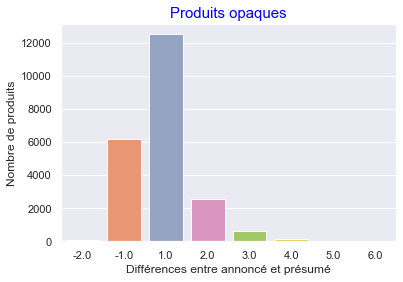

In [125]:
sns.countplot(df_palm['palm_opaque'].loc[df_palm['palm_opaque']!=0])
plt.title("Produits opaques", fontsize=15, color="blue")
plt.xlabel('Différences entre annoncé et présumé')
plt.ylabel('Nombre de produits')

Text(0.5, 1.0, 'Comparaison entre ingrédients annoncés et présumés')

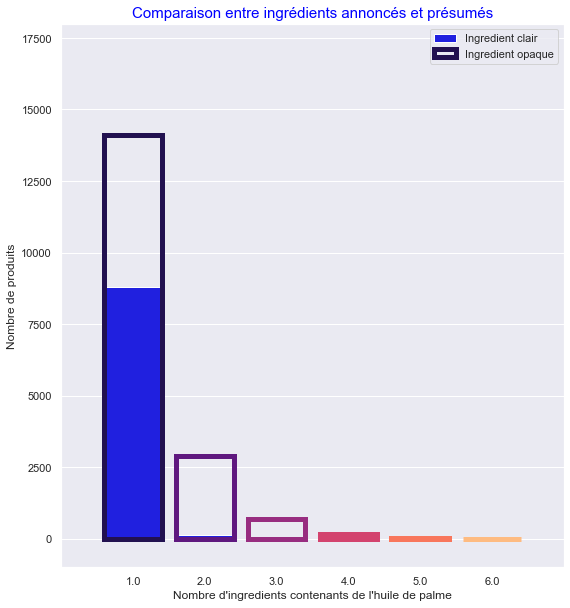

In [126]:
plt.figure(1,figsize=[9,10])
sns.countplot(df_palm['ingredients_from_palm_oil_n'].loc[df_palm['ingredients_from_palm_oil_n']!=0], color="blue", label="Ingredient clair")
ax=sns.countplot(df_palm['ingredients_that_may_be_from_palm_oil_n'].loc[df_palm['ingredients_that_may_be_from_palm_oil_n']!=0], color="red", facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("magma", 6), label="Ingredient opaque")
plt.xlim(-1,6)
plt.ylim(-1000, 18000)
plt.legend()
plt.xlabel("Nombre d'ingredients contenants de l'huile de palme")
plt.ylabel("Nombre de produits")
plt.title('Comparaison entre ingrédients annoncés et présumés', fontsize=15, color="blue")

Note: On a ignoré les produits sans huiles de palmes car ils nuisent (Par leur nombre) à une bonne visualisation. 

# Huile de palme X Nutriscore

Explorons maintenant l'impact de l'huile de palmes sur le Nutriscore, commençons d'abords par éliminé les produits qui ne sont pas labelisé par un grade de Nutriscore.

In [127]:
dfpnutri=df_palm.loc[df_palm['nutriscore_grade'] != ""]
dfpnutri.nutriscore_grade.unique()

array(['d', 'a', 'b', 'e', 'c'], dtype=object)

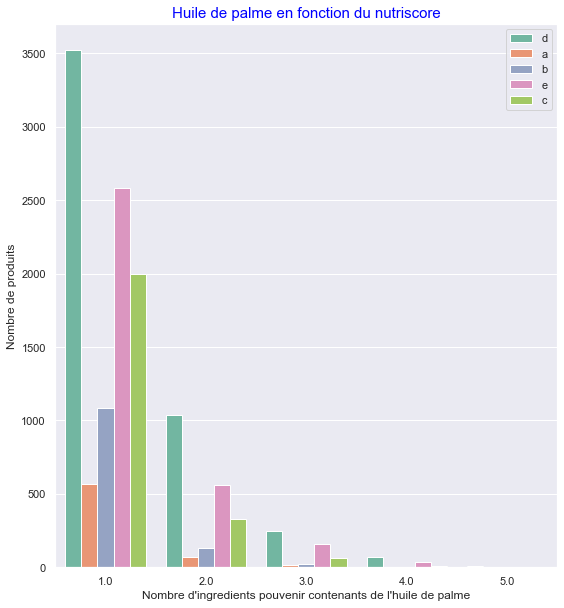

In [128]:
plt.figure(1,figsize=[9,10])
sns.countplot(dfpnutri['ingredients_that_may_be_from_palm_oil_n'].loc[df_palm['ingredients_that_may_be_from_palm_oil_n']!=0],
              hue=dfpnutri['nutriscore_grade'])
plt.xlabel("Nombre d'ingredients pouvenir contenants de l'huile de palme")
plt.ylabel("Nombre de produits")
plt.title("Huile de palme en fonction du nutriscore", fontsize=15, color="blue")
plt.legend(loc = 'upper right')

Text(0.5, 1.0, "Présence potentiel d'huile de palmes")

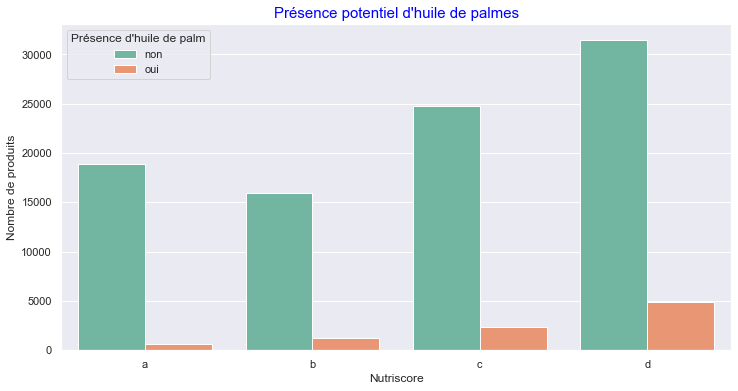

In [129]:
plt.figure(1,figsize=[12,6])
sns.countplot(dfpnutri['nutriscore_grade'],
              hue=dfpnutri['boolpalm'], order=["a","b","c","d"])

plt.xlabel("Nutriscore")
plt.ylabel("Nombre de produits")
plt.legend(["non", "oui"],title = "Présence d'huile de palm")
plt.title("Présence potentiel d'huile de palmes", fontsize=15, color="blue")

# Etude valeurs nutritives

## Evolution valeurs nutritive par rapport a nutriscore et influence de l'huile de palme

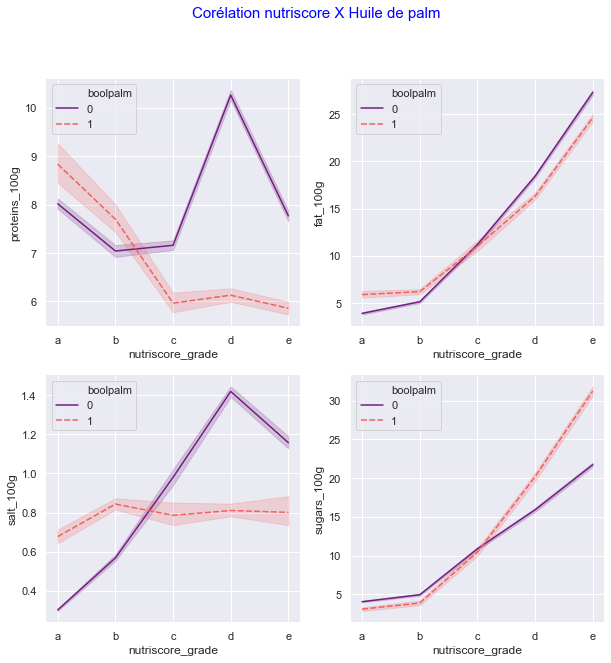

In [135]:
plt.figure(figsize=[10,10])
plt.suptitle('Corélation nutriscore X Huile de palm', fontsize=15, color="blue")
plt.subplot(2,2,1)
g1= sns.lineplot(
    data=dfpnutri,
    x="nutriscore_grade", y="proteins_100g",
    style="boolpalm", hue= "boolpalm",
    
    palette='magma', sizes=(10, 200) 
)
plt.subplot(2,2,2)
g2= sns.lineplot(
    data=dfpnutri,
    x="nutriscore_grade", y="fat_100g",
    style="boolpalm", hue= "boolpalm",
    
    palette='magma', sizes=(10, 200)
)

plt.subplot(2,2,3)
g3= sns.lineplot(
    data=dfpnutri,
    x="nutriscore_grade", y="salt_100g",
    style="boolpalm", hue= "boolpalm",
    
    palette='magma', sizes=(10, 200)
)

plt.subplot(2,2,4)
g4= sns.lineplot(
    data=dfpnutri,
    x="nutriscore_grade", y="sugars_100g",
    style="boolpalm", hue= "boolpalm",
    
    palette='magma', sizes=(10, 200)
)


ax.xaxis.grid(True, "minor", linewidth=.25)
ax.yaxis.grid(True, "minor", linewidth=.25)
sns.despine(left=True, bottom=True)

## Element nutritive par nutriscore 

### 1ere méthode

In [ ]:
meanS=[]
meanF=[]
meanP=[]
meanSu=[]
listeN=['a','b','c','d','e']
index= [1,2,3,4]

for n in listeN:
    meanS.append(dfpnutri['salt_100g'].loc[dfpnutri['nutriscore_grade']==n].mean())
    meanF.append(dfpnutri['fat_100g'].loc[dfpnutri['nutriscore_grade']==n].mean())
    meanP.append(dfpnutri['proteins_100g'].loc[dfpnutri['nutriscore_grade']==n].mean())
    meanSu.append(dfpnutri['sugars_100g'].loc[dfpnutri['nutriscore_grade']==n].mean())


Text(0.5, 1.0, 'Evolution des teneurs nutritives en fonction du nutriscore')

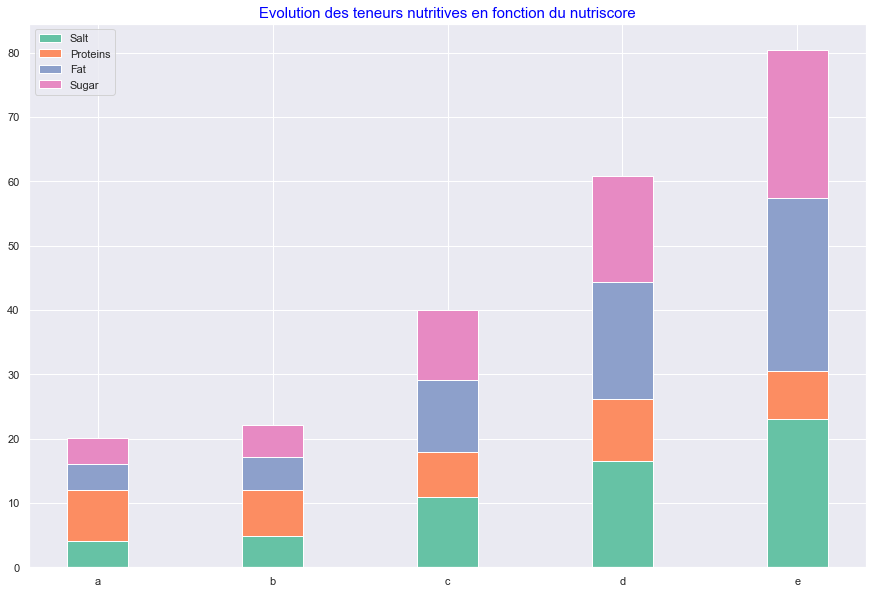

In [351]:
A=np.array(meanS)
B=np.array(meanP)
C=np.array(meanF)
D=np.array(meanSu)
N= 5 #Nombre de catégorie
ind= [0,1,2,3,4]
width= 0.35
sns.set(palette='Set2')
plt.figure(figsize=[15,10])
p1= plt.bar(ind, A, width)
p2=plt.bar(ind,B, width,
          bottom=A)
p3= plt.bar(ind,C, width,
          bottom=(A+B))
p4= plt.bar(ind,D, width,
          bottom=(A + B + C ))
plt.xticks(ind,listeN)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Salt', 'Proteins','Fat','Sugar'))
plt.title('Evolution des teneurs nutritives en fonction du nutriscore', fontsize=15, color="blue")

### 2eme méthode (boucle)

In [ ]:
Xu=dfpnutri[['nutriscore_grade','salt_100g','proteins_100g','fat_100g','sugars_100g']]

Text(0.5, 1.0, 'Evolution des teneurs nutritives en fonction du nutriscore')

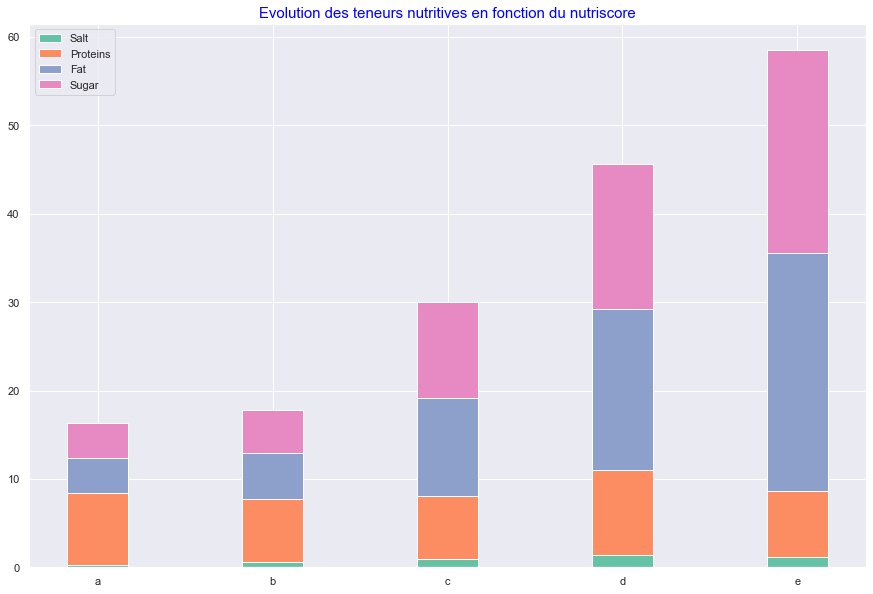

In [352]:
plt.figure(figsize=[15,10])
index= [1,2,3,4]
listeN=['a','b','c','d','e']
N=5
bot= 0
width= 0.35
ind=[1,2,3,4,5]
for n in index:
    meanS=[]
    for i in listeN:
        meanS.append(Xu.iloc[:,n].loc[Xu.iloc[:,0]==i].mean())   
    plt.bar(ind, meanS, width, bottom=bot)
    if type(bot)is int:
        bot=np.array(meanS)
    else:
        bot=bot+np.array(meanS)
plt.xticks(ind,listeN)
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Salt', 'Proteins','Fat','Sugar'))
plt.title('Evolution des teneurs nutritives en fonction du nutriscore', fontsize=15, color="blue")


<function matplotlib.pyplot.show(*args, **kw)>

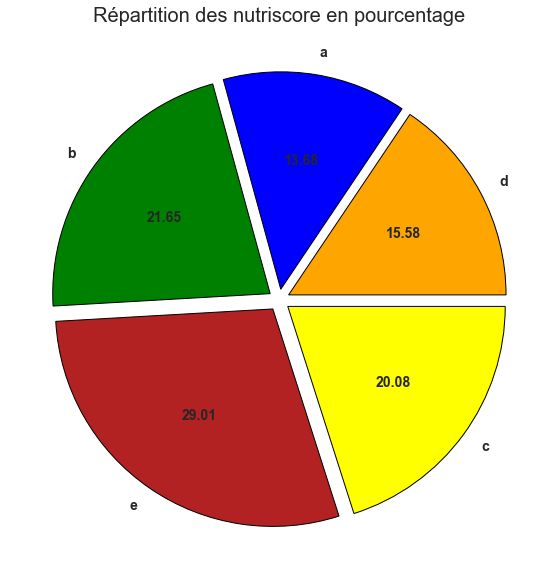

In [354]:
color=['Orange',"Blue","Green","Firebrick","Yellow"]
plt.figure(figsize=(10,10))
plt.pie(Xu.nutriscore_grade.groupby(Xu['nutriscore_grade']).count(), 
        labels=Xu['nutriscore_grade'].unique(), 
        explode= (0.05,0.05,0.05,0.05,0.05),
       autopct="%.2f",
       wedgeprops={'ls':"-",'lw':1,"edgecolor":"Black","animated": True},
       textprops={'fontsize': 14,'weight': "bold"},
       colors=color)
#plt.textprops(fontweight='bold')
plt.title("Répartition des nutriscore en pourcentage", fontsize=20)
plt.show

Nous avons vu de manière superficiel que la présence d'huile de palme avait une certaine incidence sur l'attribution d'un certain grade de Nutriscore allant de A à E ce nutriscore est attribué en fonction d'un score numérique explorons un peu cet aspect. 

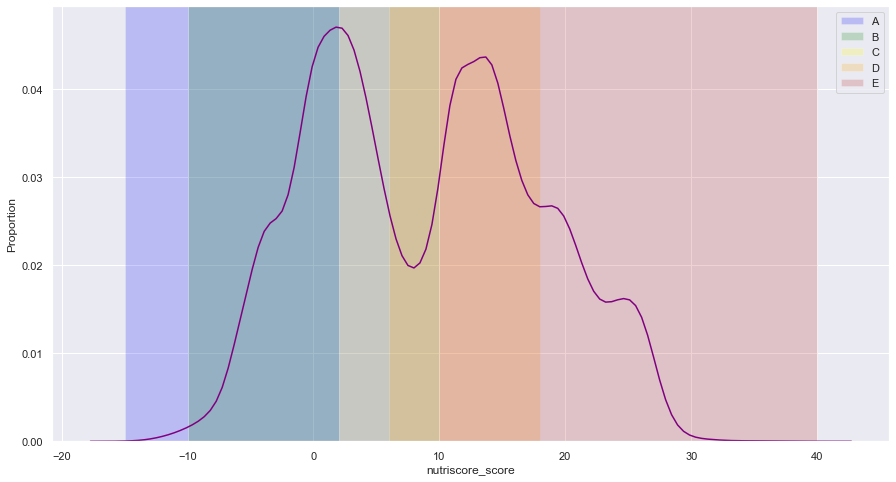

In [258]:
plt.figure(figsize=(15,8))

sns.distplot(dfpnutri["nutriscore_score"], hist=False ,kde=True, norm_hist=False, color="Purple")

listB=["a","b","c","d","e"]
color=['Blue',"Green","Yellow","Orange","Firebrick"]
n=0
for i in listB :
    minus= dfpnutri['nutriscore_score'].loc[dfpnutri['nutriscore_grade']==i].min()
    maxus= dfpnutri['nutriscore_score'].loc[dfpnutri['nutriscore_grade']==i].max()
    plt.axvspan(minus, maxus, facecolor=color[n], alpha=0.2,label=listB[n].upper())
    #plt.axvline(dfpnutri["nutriscore_score"].loc[dfpnutri['nutriscore_grade']== i].mean(), 0, 1, ls="--", color="Black")
    #plt.axvline(dfpnutri["nutriscore_score"].loc[dfpnutri['nutriscore_grade']== i].max(), 0, 1, linestyle="--", color = "Red")
    n=n+1
plt.ylabel("Proportion")
plt.legend()

Sur ce graphique on repère une légere contradiction par rapport aux proportion présenté par notre piechart en effet il semble que le nutriscore A à une répartition plus étendue qu'elle ne devrait. Explorons plus en détail les chiffres des différentes catégorie.

In [305]:
minus=[]
maxus=[]
medius=[]
meanius=[]
for n in listeN:
    minus.append(dfpnutri["nutriscore_score"].loc[dfpnutri['nutriscore_grade']== n].min())
    maxus.append(dfpnutri["nutriscore_score"].loc[dfpnutri['nutriscore_grade']== n].max())
    meanius.append(dfpnutri["nutriscore_score"].loc[dfpnutri['nutriscore_grade']== n].mean())
    medius.append(dfpnutri["nutriscore_score"].loc[dfpnutri['nutriscore_grade']== n].median())
    
    

data = {'Nutriscore_grade': listeN,
        'Score_Min': minus,
        'Score_Max':maxus,
        'Score_Median':medius,
        'Score_Mean':meanius
       }
dfbornes=pd.DataFrame(data, columns = data.keys())
dfbornes

,Nutriscore_grade,Score_Min,Score_Max,Score_Median,Score_Mean
0,a,-15.0,10.0,-3.0,-3.495114
1,b,-10.0,2.0,1.0,0.884932
2,c,2.0,10.0,5.0,5.558112
3,d,6.0,18.0,14.0,13.719769
4,e,10.0,40.0,21.0,21.179570


Effectivement on note que certain nutriscore_grade chevauchent d'autres notamment le grade : A avec une valeur de score allant de -15 à 10 avec une mediane de -3.0 et une moyenne de -3.5. Ainsi il flirt avec les catégorie B voir C. Par ailleurs les autre catégories semble se comporter assez uniformément par rapport au Score.

In [300]:
dfpnutri[['nutriscore_score','product_name']].sort_values(by=['nutriscore_score'],ascending=False).loc[dfpnutri['nutriscore_grade']=="a"].head(15)

,nutriscore_score,product_name
523403,10.0,Travel water
240511,10.0,Eau gazeuse
167770,4.0,Eau gazeuse Perrier fines bulles 1L
210028,4.0,St-Pierre pétillante
487077,4.0,Volvic coffee maracuja
200296,3.0,Eau de source gazéifiée Roxane Hovelange
174409,2.0,Puits St Georges Gazeuse
209318,2.0,"Eau de sources 1,5L"
174410,2.0,Puits Saint Georges - Gazeuse - Eau minérale n...
212238,2.0,Eau minerale naturelle


On remarque que deux produits ont un score très élevé couplé avec un remplissage du product_name partiel. Essayons d'amputer ceux deux valeurs. afin de lisser notre visuel.

In [314]:
dfnutrisc=dfpnutri
dfnutrisc.query('nutriscore_score == 10 & nutriscore_grade == "a"')

,code,creator,product_name,quantity,packaging,brands,categories,categories_en,labels,labels_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,palm_opaque,boolpalm
240511,3274080090016,openfoodfacts-contributors,Eau gazeuse,"1,25 L","Bouteille,Plastique",Vernière,"Boissons, Eaux, Boissons gazeuses, Eaux de sou...","Beverages,Waters,Carbonated drinks,Spring wate...",fr:100-naturellement-gazeuse,fr:100-naturellement-gazeuse,...,NaN,NaN,NaN,NaN,NaN,27.5000,11.00000,10.0,0.0,0
523403,5411118201015,sebleouf,Travel water,500 ml,"Bouteille,Plastique",NV Top Bronnen,"Boissons, Eaux, Eaux de sources","Beverages,Waters,Spring waters",,,...,NaN,NaN,NaN,NaN,NaN,2.6924,1.07696,10.0,0.0,0


In [319]:
dfnutrisc=dfnutrisc.drop([240511,523403])

'b'

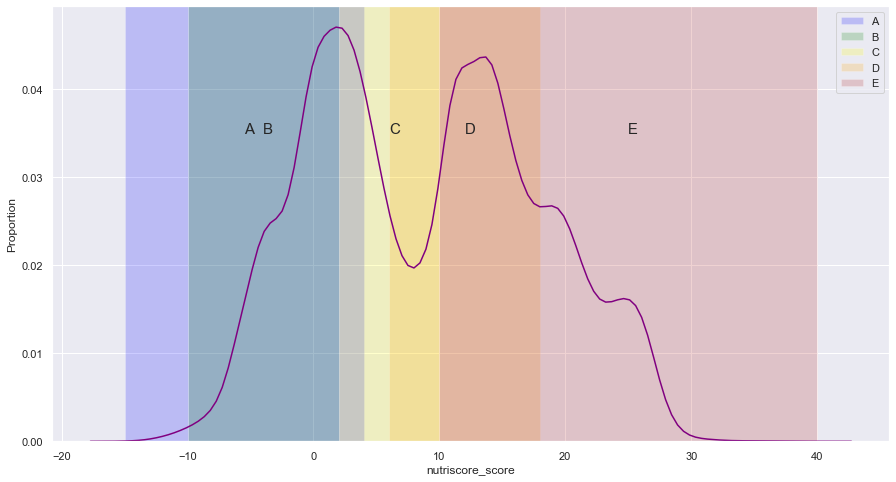

In [332]:
plt.figure(figsize=(15,8))

sns.distplot(dfnutrisc["nutriscore_score"], hist=False ,kde=True, norm_hist=False, color="Purple")

listB=["a","b","c","d","e"]
color=['Blue',"Green","Yellow","Orange","Firebrick"]
n=0
for i in listB :
    minus= dfnutrisc['nutriscore_score'].loc[dfnutrisc['nutriscore_grade']==i].min()
    maxus= dfnutrisc['nutriscore_score'].loc[dfnutrisc['nutriscore_grade']==i].max()
    plt.axvspan(minus, maxus, facecolor=color[n], alpha=0.2,label=listB[n].upper())
    plt.text(x=(minus+maxus)/2 ,y = 0.035,s= listB[n].upper(),fontsize=15)
    n=n+1
plt.ylabel("Proportion")
plt.legend()
listB[1]
#Les deux catégories A et B restent très proche l'une de l'autre.


Les Scores semblent déterminer globalement la catégorisation des produits dans un grade mais ce n'est pas le seul car la présence ou l'absence de tel ou tel ingrédient semble influer dans le basculement de certains produit d'une catégorie à l'autre. <br/><br/>
Reprennons notre champs d'étude de l'huile de palme.

In [337]:
dfnopalm=dfnutrisc.loc[dfnutrisc["boolpalm"]==0]
dfpalm=dfnutrisc.loc[dfnutrisc['boolpalm']==1]

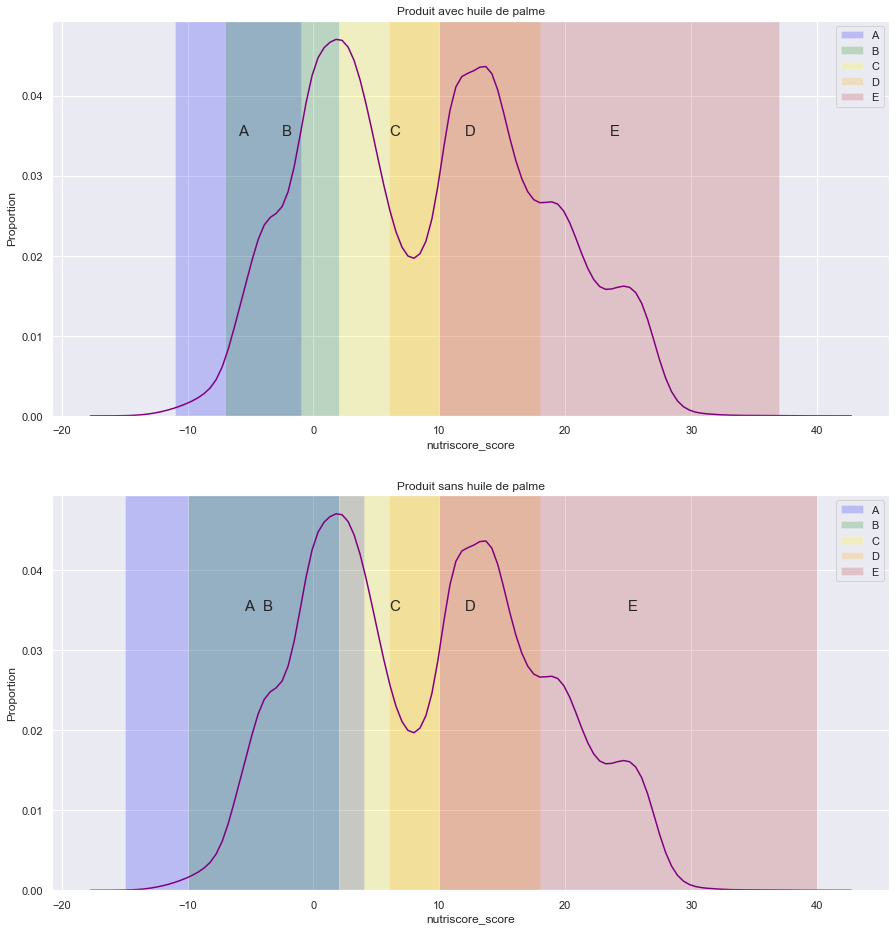

In [340]:
plt.figure(figsize=(15,16))

plt.subplot(2,1,1)
sns.distplot(dfnutrisc["nutriscore_score"], hist=False ,kde=True, norm_hist=False, color="Purple")

listB=["a","b","c","d","e"]
color=['Blue',"Green","Yellow","Orange","Firebrick"]
n=0
for i in listB :
    minus= dfpalm['nutriscore_score'].loc[dfpalm['nutriscore_grade']==i].min()
    maxus= dfpalm['nutriscore_score'].loc[dfpalm['nutriscore_grade']==i].max()
    plt.axvspan(minus, maxus, facecolor=color[n], alpha=0.2,label=listB[n].upper())
    plt.text(x=(minus+maxus)/2 ,y = 0.035,s= listB[n].upper(),fontsize=15)
    n=n+1
plt.ylabel("Proportion")
plt.legend()
plt.title('Produit avec huile de palme')

plt.subplot(2,1,2)
sns.distplot(dfnutrisc["nutriscore_score"], hist=False ,kde=True, norm_hist=False, color="Purple")

listB=["a","b","c","d","e"]
color=['Blue',"Green","Yellow","Orange","Firebrick"]
n=0
for i in listB :
    minus= dfnopalm['nutriscore_score'].loc[dfnopalm['nutriscore_grade']==i].min()
    maxus= dfnopalm['nutriscore_score'].loc[dfnopalm['nutriscore_grade']==i].max()
    plt.axvspan(minus, maxus, facecolor=color[n], alpha=0.2,label=listB[n].upper())
    plt.text(x=(minus+maxus)/2 ,y = 0.035,s= listB[n].upper(),fontsize=15)
    n=n+1
plt.ylabel("Proportion")
plt.title('Produit sans huile de palme')
plt.legend()


In [341]:
minus=[]
maxus=[]
medius=[]
meanius=[]
for n in listeN:
    minus.append(dfpalm["nutriscore_score"].loc[dfpalm['nutriscore_grade']== n].min())
    maxus.append(dfpalm["nutriscore_score"].loc[dfpalm['nutriscore_grade']== n].max())
    meanius.append(dfpalm["nutriscore_score"].loc[dfpalm['nutriscore_grade']== n].mean())
    medius.append(dfpalm["nutriscore_score"].loc[dfpalm['nutriscore_grade']== n].median())
    
    

data = {'Nutriscore_grade': listeN,
        'Score_Min': minus,
        'Score_Max':maxus,
        'Score_Median':medius,
        'Score_Mean':meanius
       }
dfbornepalm=pd.DataFrame(data, columns = data.keys())

,Nutriscore_grade,Score_Min,Score_Max,Score_Median,Score_Mean
0,a,-11.0,-1.0,-2.0,-2.197531
1,b,-7.0,2.0,1.0,1.091129
2,c,2.0,10.0,6.0,6.183181
3,d,6.0,18.0,14.0,14.356895
4,e,10.0,37.0,22.0,22.231254


In [344]:
minus=[]
maxus=[]
medius=[]
meanius=[]
for n in listeN:
    minus.append(dfnopalm["nutriscore_score"].loc[dfnopalm['nutriscore_grade']== n].min())
    maxus.append(dfnopalm["nutriscore_score"].loc[dfnopalm['nutriscore_grade']== n].max())
    meanius.append(dfnopalm["nutriscore_score"].loc[dfnopalm['nutriscore_grade']== n].mean())
    medius.append(dfnopalm["nutriscore_score"].loc[dfnopalm['nutriscore_grade']== n].median())
    
    

data = {'Nutriscore_grade': listeN,
        'Score_Min': minus,
        'Score_Max':maxus,
        'Score_Median':medius,
        'Score_Mean':meanius
       }
dfbornenopalm=pd.DataFrame(data, columns = data.keys())

### Comparaison avec ou sans huile de palme

In [350]:
dfbornepalm.style.background_gradient(cmap="YlGn")

,Nutriscore_grade,Score_Min,Score_Max,Score_Median,Score_Mean
0,a,-11.000000,-1.000000,-2.000000,-2.197531
1,b,-7.000000,2.000000,1.000000,1.091129
2,c,2.000000,10.000000,6.000000,6.183181
3,d,6.000000,18.000000,14.000000,14.356895
4,e,10.000000,37.000000,22.000000,22.231254


In [358]:
dfbornenopalm.style.background_gradient(cmap="YlGn")

,Nutriscore_grade,Score_Min,Score_Max,Score_Median,Score_Mean
0,a,-15.000000,4.000000,-3.000000,-3.541043
1,b,-10.000000,2.000000,1.000000,0.868866
2,c,2.000000,10.000000,5.000000,5.497476
3,d,6.000000,18.000000,14.000000,13.620762
4,e,10.000000,40.000000,21.000000,21.019127


L'étude de ces tableaux met en relief de grosses différences sur les bornes de nos catégories. Surtout pour les catégorie A et B:
<ol>
    <li><ul>
        <li>Les produits contenant de l'huile de palme en catégorie A ont un score minimum de -1 et un score minimum de -11.</li>
        <li>Les autres produits en catégorie A ont un score minimum de -15 et un maximum de 4 </li></ul></li>
    <br/>
        <li><ul>
            <li>Pour la catégorie B le minimum des produits avec huile de palme ont un minimum de -7 et un max 2</li>
            <li>Les autres produits ont un minimum de -10</li></ul></li></ol>

#### Conclusion

Celà conforte nos hypothèses de bases:
    <ul>
    <li>Le nutriscore_grade est en grande partie déterminer par le nutriscore_score cependant tout les produits ne sont pas égale et certain produit avec un même score ne sont pas dans la même catégorie.</li>
    <li>Le nutriscore semble être influencer négativement par la présence d'huile de palmes comme en témoigne les résultats</li>
    <li>On peut même statuer sur un malus de +/- 5 en fonction de la présence d'huile de palme.</li></ul>

### Etudes des grands indicateurs nutritifs.

In [359]:
dfnutrisc.columns

Index(['code', 'creator', 'product_name', 'quantity', 'packaging', 'brands',
       'categories', 'categories_en', 'labels', 'labels_tags', 'labels_en',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states_en', 'main_category', 'main_category_en', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g', 'palm_opaque', 'boolpalm'],
      dtype='object')

Text(0.5, 1.0, 'Sel')

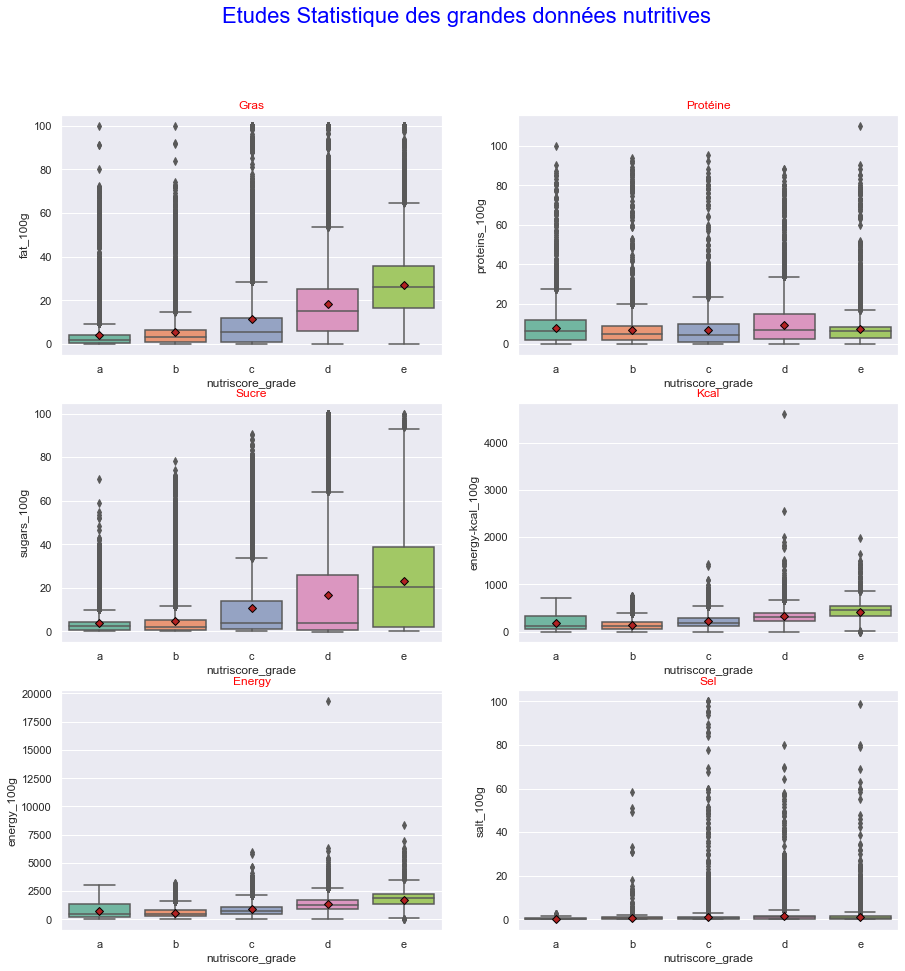

In [392]:
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
order=['a','b','c','d','e']


plt.figure(figsize=(15,15))
plt.suptitle("Etudes Statistique des grandes données nutritives", fontsize=22, color="Blue")
plt.subplot(3,2,1)
sns.boxplot(y="fat_100g",x="nutriscore_grade", orient="v", data=dfnutrisc, 
           showmeans=True,
           meanprops= meanpointprops
           ,order=order)
plt.title("Gras", color="Red")


plt.subplot(3,2,2)
sns.boxplot(y="proteins_100g",x="nutriscore_grade", orient="v", data=dfnutrisc
            , showmeans=True,
           meanprops= meanpointprops
           ,order=order)
plt.title("Protéine", color="Red")

plt.subplot(3,2,3)
sns.boxplot(y="sugars_100g",x="nutriscore_grade", orient="v", data=dfnutrisc
            , showmeans=True,
           meanprops= meanpointprops
           ,order=order)
plt.title("Sucre", color="Red")

plt.subplot(3,2,4)
sns.boxplot(y="energy-kcal_100g",x="nutriscore_grade", orient="v", data=dfnutrisc
            , showmeans=True,
           meanprops= meanpointprops
           ,order=order)
plt.title("Kcal", color="Red")


plt.subplot(3,2,5)
sns.boxplot(y="energy_100g",x="nutriscore_grade", orient="v", data=dfnutrisc
            , showmeans=True,
           meanprops= meanpointprops
           ,order=order)
plt.title("Energy", color="Red")

plt.subplot(3,2,6)
sns.boxplot(y="salt_100g",x="nutriscore_grade", orient="v", data=dfnutrisc
            , showmeans=True,
           meanprops= meanpointprops
           ,order=order)
plt.title("Sel", color="Red")